# Simple Linear Regression

In [2]:
# Import important libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Load Dataset
df = pd.read_csv(r'D:\Machine Learning\Machine-Learning\Regression\HeightWeight.csv')
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
# Drop Column Index
df = df.drop(columns=['Index'])
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
# Total Data
df.shape

(25000, 2)

In [6]:
# describr Dataset
df.describe()


,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [7]:
# Basic Info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


In [8]:
# Checking Nulls
df.isnull().sum()

Height(Inches)    0
Weight(Pounds)    0
dtype: int64

# Exploratory Data Analysis

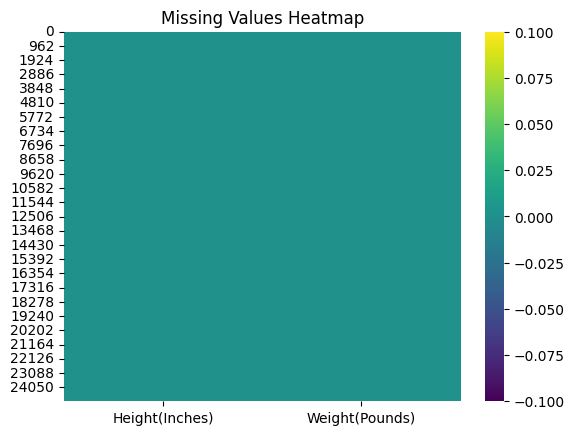

In [9]:
# Checking Nulls Through Heatmap
sns.heatmap(df.isnull(), cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


Text(0.5, 1.0, 'Height(Inches)')

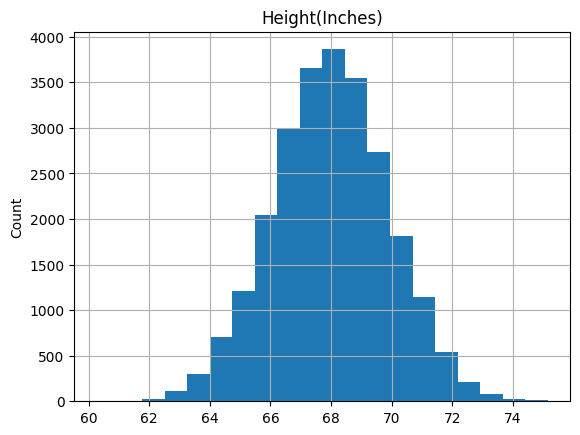

In [10]:

df['Height(Inches)'].hist(bins=20)
plt.ylabel("Count")
plt.title('Height(Inches)')

df['Weight(Pounds)'].hist(bins=20)
plt.ylabel("Count")
plt.title('Weight(Pounds)')

# Feature Engineering

In [11]:
# Convert 'Height(Inches)' to feet
df['Height(Feet)'] = df['Height(Inches)'] * 0.0833333 

# Convert 'Weight(Pounds)' to kilograms
df['Weight(Kg)'] = df['Weight(Pounds)'] * 0.453592

# Drop the original columns if needed
df.drop(columns=['Weight(Pounds)', 'Height(Inches)'], inplace=True)
df.head()

,Height(Feet),Weight(Kg)
0,5.481940,51.252494
1,5.959598,61.909547
2,5.783226,69.411778
3,5.684714,64.562199
4,5.648982,65.452010


In [12]:
df.head()

,Height(Feet),Weight(Kg)
0,5.481940,51.252494
1,5.959598,61.909547
2,5.783226,69.411778
3,5.684714,64.562199
4,5.648982,65.452010


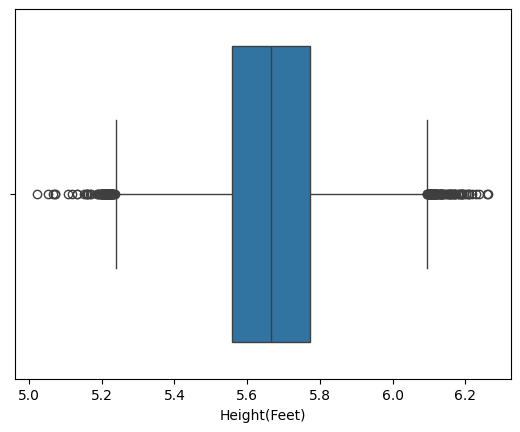

In [13]:
# Checking Outliers in 	Height(Feet) Column
sns.boxplot(x='Height(Feet)',data=df)
plt.show()

In [14]:

# Calculate mean and standard deviation for Height
mean_height = df['Height(Feet)'].mean()
std_dev_height = df['Height(Feet)'].std()

# Z-score calculation for Height
z_scores_height = (df['Height(Feet)'] - mean_height) / std_dev_height

# Define threshold
threshold = 2.5

# Identify outliers for Height
outliers_height = df['Height(Feet)'][abs(z_scores_height) > threshold]
df_no_outliers_height = df['Height(Feet)'][abs(z_scores_height) <= threshold]

# Number of removed outliers and list of outliers for Height
num_removed_outliers_height = len(outliers_height)
outlier_list_height = outliers_height.tolist()

# Print statistics for Height
print("Height:")
print("Mean:", mean_height)
print("Standard Deviation:", std_dev_height)
print("Threshold:", threshold)
print("Number of data points without outliers:", len(df) - num_removed_outliers_height)
print("Number of removed outliers:", num_removed_outliers_height)
print("List of outliers:", outlier_list_height)


Height:
Mean: 5.666090533296213
Standard Deviation: 0.15847316754450852
Threshold: 2.5
Number of data points without outliers: 24703
Number of removed outliers: 297
List of outliers: [6.158420036631, 6.1528008722120004, 6.105724224376, 5.265962893614, 5.168052932778, 5.26045622915, 6.077460069015, 6.0826642336, 5.2671137264870005, 5.229197074987, 6.187413358367, 5.2201995785860005, 6.182904193504, 6.0705725717700005, 6.115088387297, 6.26273082824, 6.069591738829001, 6.0748575700559995, 5.217173746463, 5.231827907267999, 6.1662883668170005, 6.259596662827, 5.26613956021, 5.238993737735, 5.051052146245, 6.065754240364, 6.092299229746, 5.228172075397, 5.211342915462001, 5.239744570768, 5.261201228851999, 6.112525888322, 6.0693050722769994, 6.104390058242999, 6.13919754432, 5.15778127022, 5.2213979114399995, 5.244302902278, 5.237046238514, 5.204134585012, 5.253208732049, 5.268660392535, 6.090735897038, 6.169811698740999, 6.126773382623, 6.064715907446, 5.261942061889, 6.096665061333, 5.249

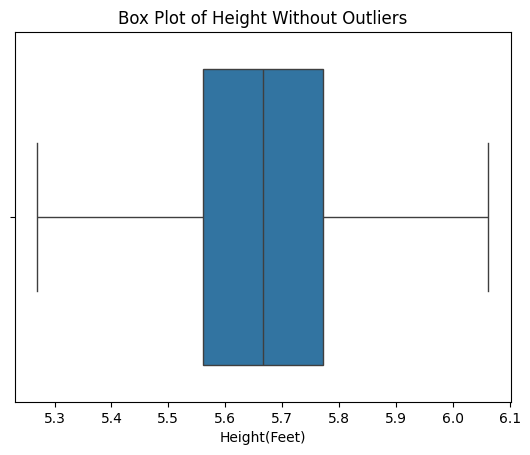

In [15]:
df_no_outliers = pd.DataFrame({'Height(Feet)': df_no_outliers_height})

# Create a boxplot for non-outlier data
sns.boxplot(x='Height(Feet)', data=df_no_outliers)
plt.title('Box Plot of Height Without Outliers')
plt.show()

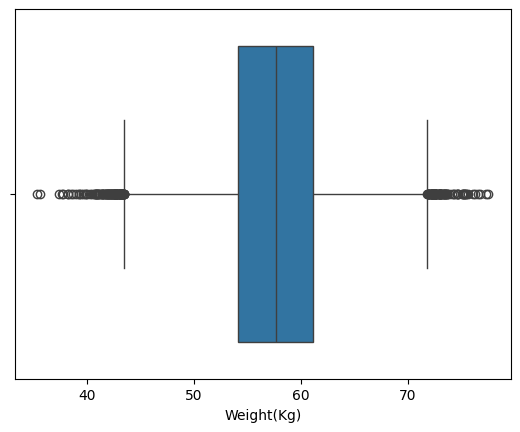

In [16]:
# Checking Outliers in Weight Column
sns.boxplot(x='Weight(Kg)',data=df)
plt.show()

In [17]:

# Calculate mean and standard deviation for weight
mean_weight = df['Weight(Kg)'].mean()
std_dev_weight = df['Weight(Kg)'].std()

# Z-score calculation for weight
z_scores_weight = (df['Weight(Kg)'] - mean_weight) / std_dev_weight

# Define threshold
threshold = 2.5

# Identify outliers for Weight
outliers_weight = df['Weight(Kg)'][abs(z_scores_weight) > threshold]
df_no_outliers_weight = df['Weight(Kg)'][abs(z_scores_weight) <= threshold]

# Number of removed outliers and list of outliers for weight
num_removed_outliers_weight = len(outliers_weight)
outlier_list_weight = outliers_weight.tolist()

# Print statistics for Weight
print("Weight:")
print("Mean:", mean_weight)
print("Standard Deviation:", std_dev_weight)
print("Threshold:", threshold)
print("Number of data points without outliers:", len(df) - num_removed_outliers_weight)
print("Number of removed outliers:", num_removed_outliers_weight)
print("List of outliers:", outlier_list_weight)


Weight:
Mean: 57.64220880316959
Standard Deviation: 5.289289847670393
Threshold: 2.5
Number of data points without outliers: 24681
Number of removed outliers: 319
List of outliers: [44.40752316072, 72.1012606704, 38.264930401600004, 42.0704538836, 76.307328568, 73.6682849528, 42.63509881296, 71.3482525912, 43.18293815872, 37.686813789839995, 43.41068670192, 71.1029953968, 72.9752870952, 72.0228346136, 43.17500029871999, 72.03009208559999, 73.8782073304, 43.7824461692, 72.4224945248, 40.95633667728, 43.45734771096, 42.869973286480004, 41.23964570456, 72.2446864608, 71.6505716592, 42.77366663304, 71.4928577208, 71.0071967664, 42.384158110799994, 41.1309968128, 71.3387271592, 70.92831711759999, 42.53913688944, 39.93716988432, 70.920469976, 72.9765571528, 42.737306698320005, 44.01009945808, 44.01692148176, 42.91539598936, 70.872162428, 71.512861128, 38.4933820124, 44.379554678, 41.90061996696, 44.36030423352, 70.9207874904, 43.429370156400005, 71.5107292456, 71.3720661712, 72.5085862863999

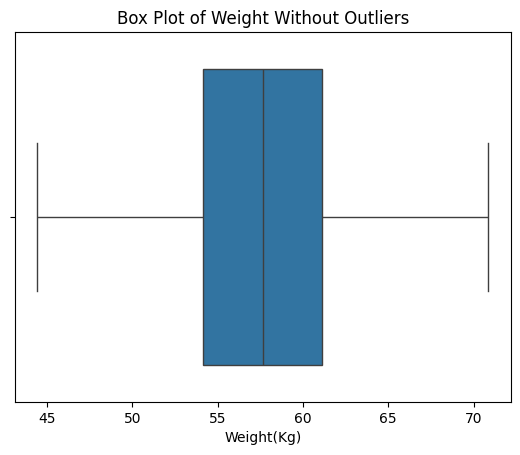

In [18]:
df_no_outliers = pd.DataFrame({'Weight(Kg)': df_no_outliers_weight})

# Create a boxplot for non-outlier data
sns.boxplot(x='Weight(Kg)', data=df_no_outliers)
plt.title('Box Plot of Weight Without Outliers')
plt.show()

In [19]:
# Change Columns Names
Height = df_no_outliers_height.rename({'df_no_outliers_height': 'Height'})
Weight = df_no_outliers_weight.rename({'df_no_outliers_Weight': 'Weight'})


In [20]:
# Create a DataFrame with Height and Weight columns
data = pd.DataFrame({'Height': Height, 'Weight': Weight})

# Save the DataFrame to a CSV file
data.to_csv('height_weight_data.csv', index=False)

In [21]:
data.head()

,Height,Weight
0,5.481940,51.252494
1,5.959598,61.909547
2,5.783226,69.411778
3,5.684714,64.562199
4,5.648982,65.452010


In [22]:
# Nulls
data.isnull().sum()

Height    262
Weight    284
dtype: int64

In [23]:
# Dealing with Nulls values
from sklearn.impute import SimpleImputer

# Create an instance of SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'Height' column
data['Height'] = imputer.fit_transform(data[['Height']])

# Fit and transform the imputer on the 'Weight' column
data['Weight'] = imputer.fit_transform(data[['Weight']])


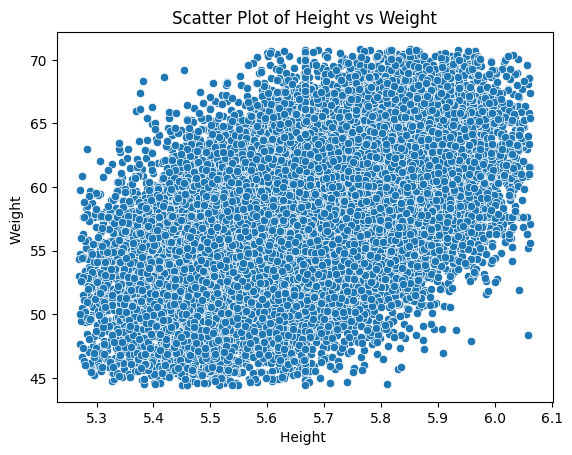

In [24]:
# scatter plot (To check Relation(Linear-Relation))
sns.scatterplot(x=data['Height'], y=data['Weight'])

# Set plot title and labels
plt.title('Scatter Plot of Height vs Weight')
plt.xlabel('Height ')
plt.ylabel('Weight ')

# Show the plot
plt.show()

In [25]:
# Correlation 
data.corr()

,Height,Weight
Height,1.000000,0.460182
Weight,0.460182,1.000000


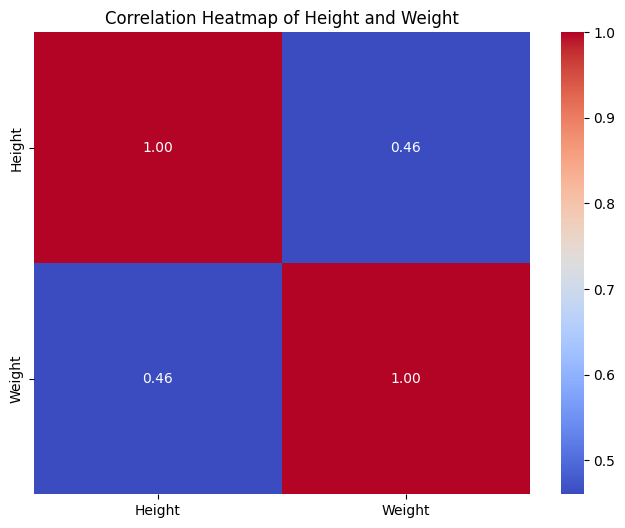

In [26]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Height and Weight')
plt.show()


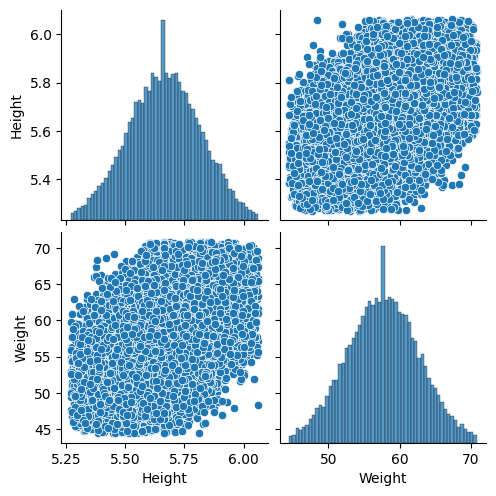

In [27]:
# Pair-plot Corr
sns.pairplot(data)

Text(0.5, 1.0, 'Height')

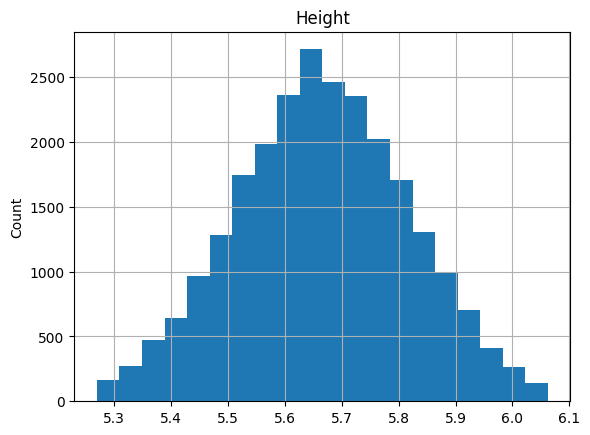

In [28]:
# No missing values in Height
data['Height'].hist(bins=20)
plt.ylabel("Count")
plt.title('Height')

Text(0.5, 1.0, 'Weight')

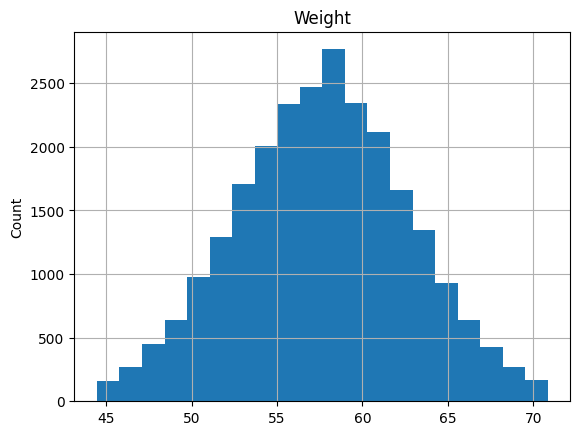

In [29]:
# No missing values in Weight 
data['Weight'].hist(bins=20)
plt.ylabel("Count")
plt.title('Weight')

<Axes: xlabel='Weight', ylabel='Density'>

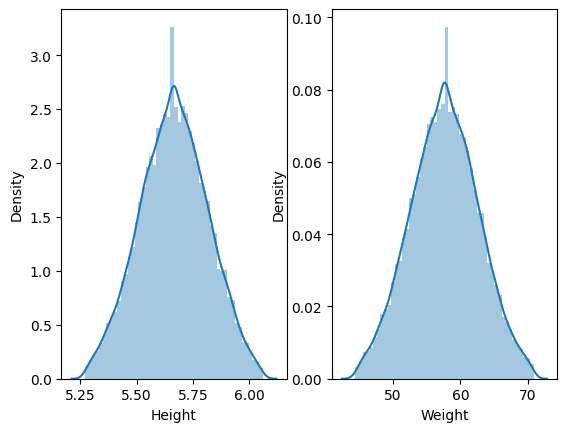

In [30]:
plt.subplot(1,2,1)
sns.distplot(data['Height'])
plt.subplot(1,2,2)
sns.distplot(data['Weight'])

# Linear Regression

In [31]:
# Import Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [32]:
data.head()

,Height,Weight
0,5.481940,51.252494
1,5.959598,61.909547
2,5.783226,69.411778
3,5.684714,64.562199
4,5.648982,65.452010


In [33]:
X = data[['Height']]  # Features (input)
y = data['Weight']    # Target variable (output)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
model = LinearRegression()
model

LinearRegression()

In [35]:
model.fit(X_train, y_train)


LinearRegression()

In [40]:
df.head()

,Height(Feet),Weight(Kg)
0,5.481940,51.252494
1,5.959598,61.909547
2,5.783226,69.411778
3,5.684714,64.562199
4,5.648982,65.452010


In [36]:
y_pred = model.predict(X_test)
y_pred


array([55.42581475, 58.81010341, 58.10025445, ..., 59.06945272,
       58.48385148, 59.42860945])

In [42]:
model.predict([[6]])


array([62.7406687])

In [43]:
unknown_pred = model.predict([[4], [5], [7], [5.7]])
unknown_pred

array([32.23794401, 47.48930636, 77.99203105, 58.16526   ])

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming y_test and y_pred are your actual and predicted values, respectively
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) Score:", r2)


Mean Squared Error (MSE): 19.97849379557441
Root Mean Squared Error (RMSE): 4.469730841513212
Mean Absolute Error (MAE): 3.5800512913813445
R-squared (R2) Score: 0.21344293355280908
